In [1]:
#https://youtu.be/mHPpCXqQd7Y?si=4ToPScvf2MBW33ES

In [2]:
!pip install librosa

In [3]:
import pandas as pd
!pip install glob2
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [4]:
#Reading in Audio Files
filename = glob("C:/Users/Dhairya Hindoriya/Audio Classification/DJ Shadow Dubai BANDLAB.wav")

In [5]:
ipd.Audio(filename[0])

In [6]:
y, sr = librosa.load(filename[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 0.02400159  0.04633186 -0.01121291  0.01977466 -0.12717776 -0.02163836
  0.10506213 -0.04009509 -0.04749245 -0.11363385]
shape y: (661504,)
sr: 22050


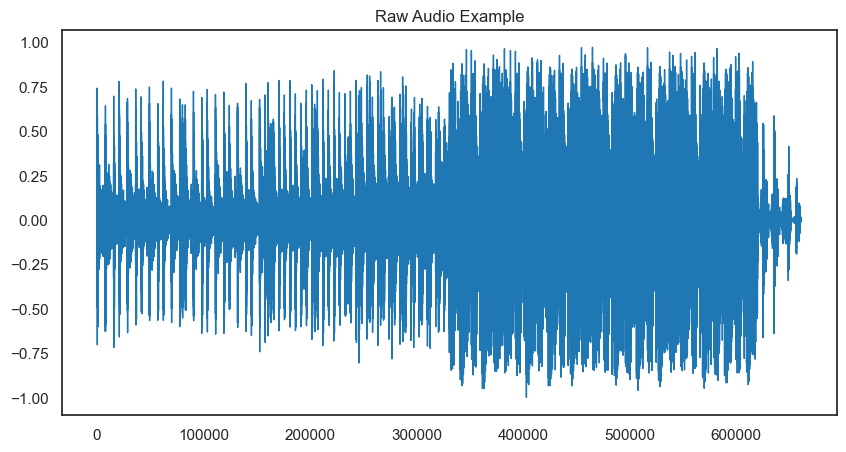

In [7]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

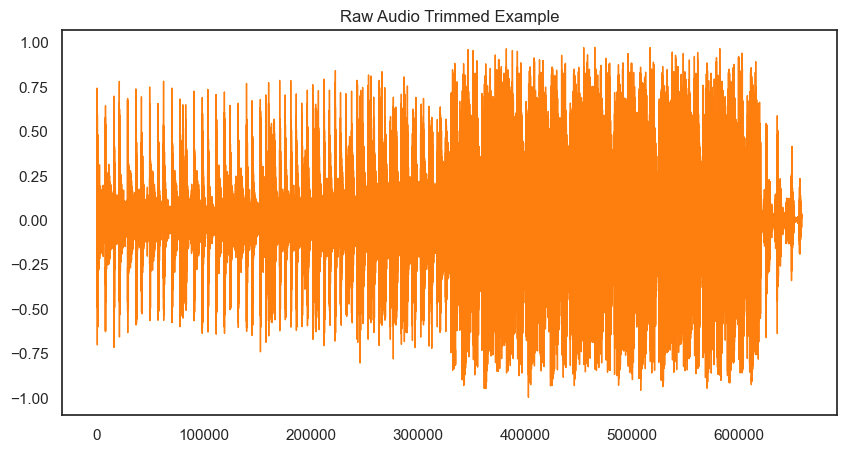

In [8]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

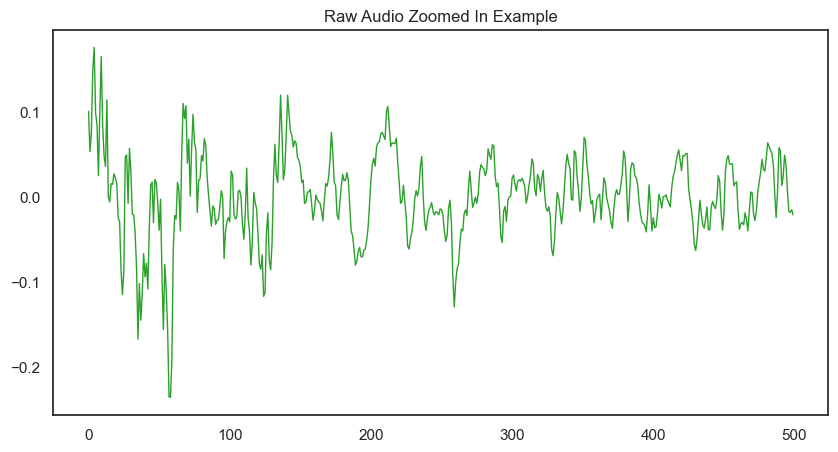

In [9]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [10]:
#Spectogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 1293)

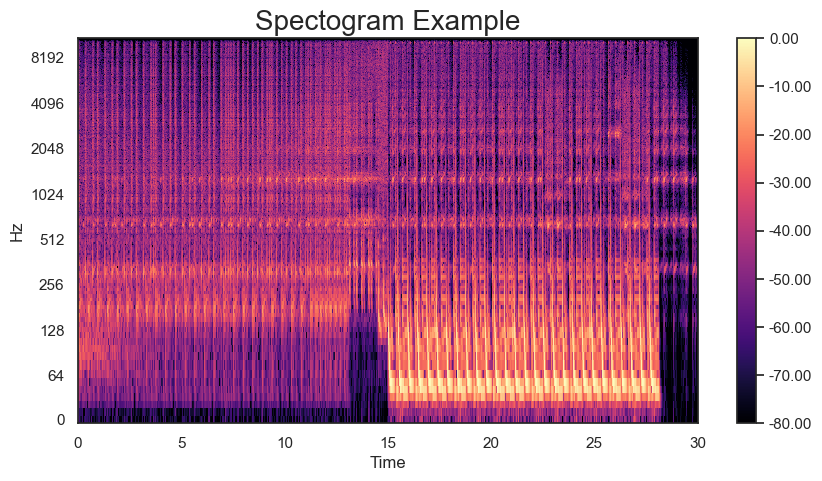

In [11]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [12]:
#Mel Spectogram
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

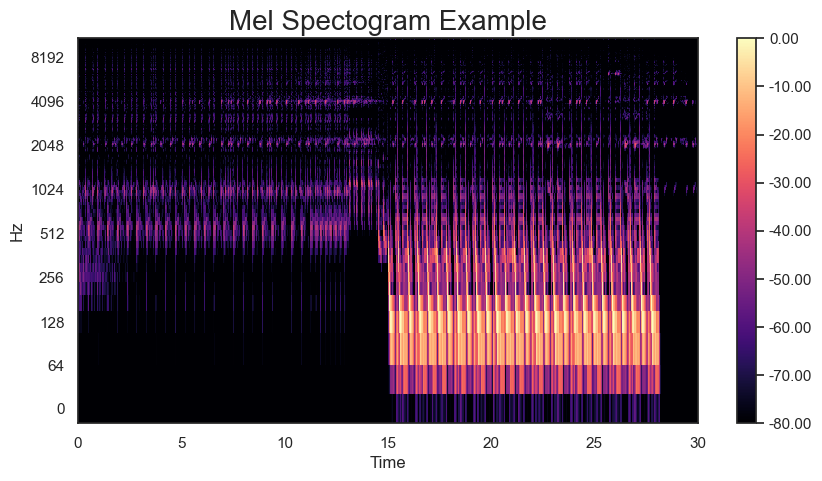

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [16]:
sr

22050

In [19]:
y

array([ 2.4001591e-02,  4.6331860e-02, -1.1212911e-02, ...,
       -3.5541598e-07,  2.4872134e-07, -1.7113052e-07], dtype=float32)